In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc = {'figure.figsize' : (15, 13)})

In [5]:
paypal = pd.read_excel('C:/Users/Administrator/Downloads/Compressed/Fintech Stocks.xlsx')
paypal.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-06,8.85,9.05,8.78,9.00,9.00,1182500
1,2016-07-07,9.02,9.20,8.91,9.08,9.08,2740500
2,2016-07-08,9.40,9.40,9.17,9.30,9.30,3183800
3,2016-07-11,9.35,9.45,9.16,9.24,9.24,2607100
4,2016-07-12,9.25,9.40,9.22,9.40,9.40,1609900


If we are having multiple sheets in our excel than we can use the sheet name function inside the read excel and after that we will specify the sheet name which we are having and at last we will give the engine as openpyxl

In [8]:
paypal = pd.read_excel('C:/Users/Administrator/Downloads/Compressed/Fintech Stocks.xlsx', sheet_name='PayPal', index_col=0, engine = 'openpyxl')
paypal.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-06,35.939999,36.169998,35.715000,35.930000,35.930000,7821300
2016-07-07,35.919998,36.389999,35.840000,36.320000,36.320000,7326700
2016-07-08,36.779999,37.459999,36.660000,37.360001,37.360001,6828600
2016-07-11,37.450001,38.330002,37.400002,38.150002,38.150002,10096200
2016-07-12,38.470001,38.910000,38.240002,38.790001,38.790001,9997200


In [9]:
# Getting the info

paypal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-07-06 to 2021-07-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [10]:
# Describing our data

paypal.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,110.970986,112.414044,109.391886,111.000095,111.000095,8.098847e+06
std,66.521580,67.517192,65.290250,66.498864,66.498864,4.054417e+06
min,35.919998,36.169998,35.715000,35.930000,35.930000,1.680000e+06
25%,64.550001,65.150002,64.102499,64.824999,64.824999,5.644775e+06
50%,90.334999,91.310001,89.475003,90.575001,90.575001,7.179200e+06
75%,119.554998,120.712500,118.582498,119.717500,119.717500,9.354500e+06
max,306.399994,309.140015,298.179993,304.790009,304.790009,4.427160e+07


To attempt calculating the daily variance and standard deviation

1. Assuming that we could extract the mean with the four datapoints: Open, High, Low, and Close prices.
2. Using the variance and standard deviation formula for the adj close benchmarked to the mean
3. Saving them in two different columns

In [12]:
paypal['Daily Mean'] = (paypal.iloc[:, 1:5].sum(axis = 1))/4
paypal

,Open,High,Low,Close,Adj Close,Volume,Daily Mean
Date,,,,,,,
2016-07-06,35.939999,36.169998,35.715000,35.930000,35.930000,7821300,35.936250
2016-07-07,35.919998,36.389999,35.840000,36.320000,36.320000,7326700,36.217500
2016-07-08,36.779999,37.459999,36.660000,37.360001,37.360001,6828600,37.210000
2016-07-11,37.450001,38.330002,37.400002,38.150002,38.150002,10096200,38.007502
2016-07-12,38.470001,38.910000,38.240002,38.790001,38.790001,9997200,38.682501
...,...,...,...,...,...,...,...
2021-06-28,290.850006,294.260010,289.779999,293.649994,293.649994,5058600,292.834999
2021-06-29,292.970001,295.179993,291.529999,292.760010,292.760010,4333200,293.057503
2021-06-30,291.529999,292.700012,289.510010,291.480011,291.480011,4236000,291.292511


In [14]:
# Getting the variance
paypal['Daily var'] = ((paypal['Adj Close']-paypal['Daily Mean'])**2)/(len(paypal.index)-1)
# Getting the standard deviation
paypal['Daily std'] = np.sqrt(paypal['Daily var'])
paypal

,Open,High,Low,Close,Adj Close,Volume,Daily Mean,Daily var,Daily std
Date,,,,,,,,,
2016-07-06,35.939999,36.169998,35.715000,35.930000,35.930000,7821300,35.936250,3.107100e-08,0.000176
2016-07-07,35.919998,36.389999,35.840000,36.320000,36.320000,7326700,36.217500,8.358235e-06,0.002891
2016-07-08,36.779999,37.459999,36.660000,37.360001,37.360001,6828600,37.210000,1.789994e-05,0.004231
2016-07-11,37.450001,38.330002,37.400002,38.150002,38.150002,10096200,38.007502,1.615453e-05,0.004019
2016-07-12,38.470001,38.910000,38.240002,38.790001,38.790001,9997200,38.682501,9.193516e-06,0.003032
...,...,...,...,...,...,...,...,...,...
2021-06-28,290.850006,294.260010,289.779999,293.649994,293.649994,5058600,292.834999,5.284140e-04,0.022987
2021-06-29,292.970001,295.179993,291.529999,292.760010,292.760010,4333200,293.057503,7.040739e-05,0.008391
2021-06-30,291.529999,292.700012,289.510010,291.480011,291.480011,4236000,291.292511,2.796838e-05,0.005289


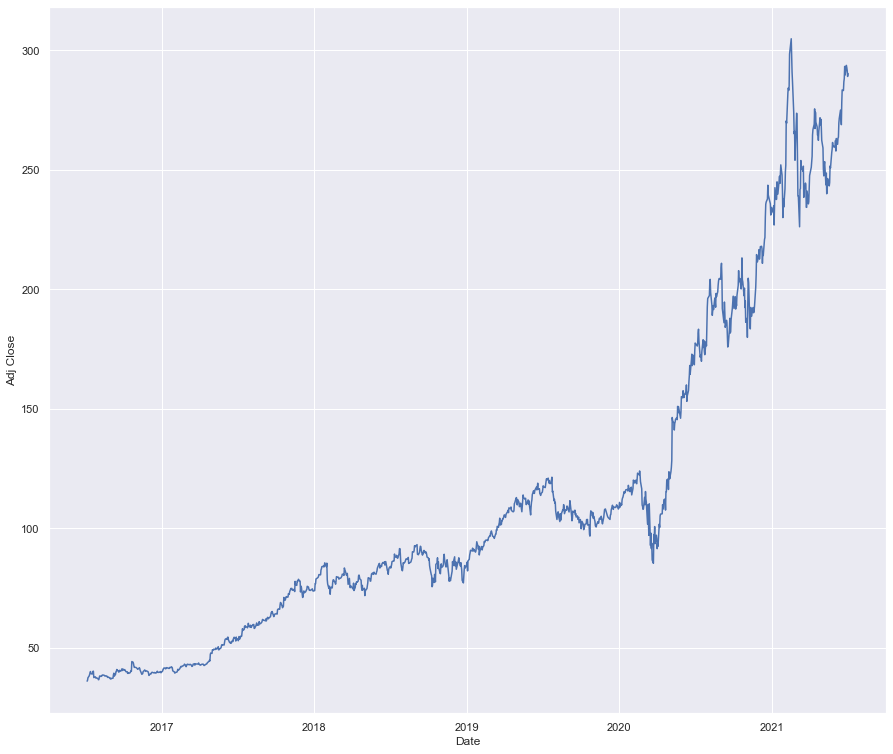

In [15]:
sns.lineplot(data=paypal, x = 'Date', y = 'Adj Close')
plt.show()

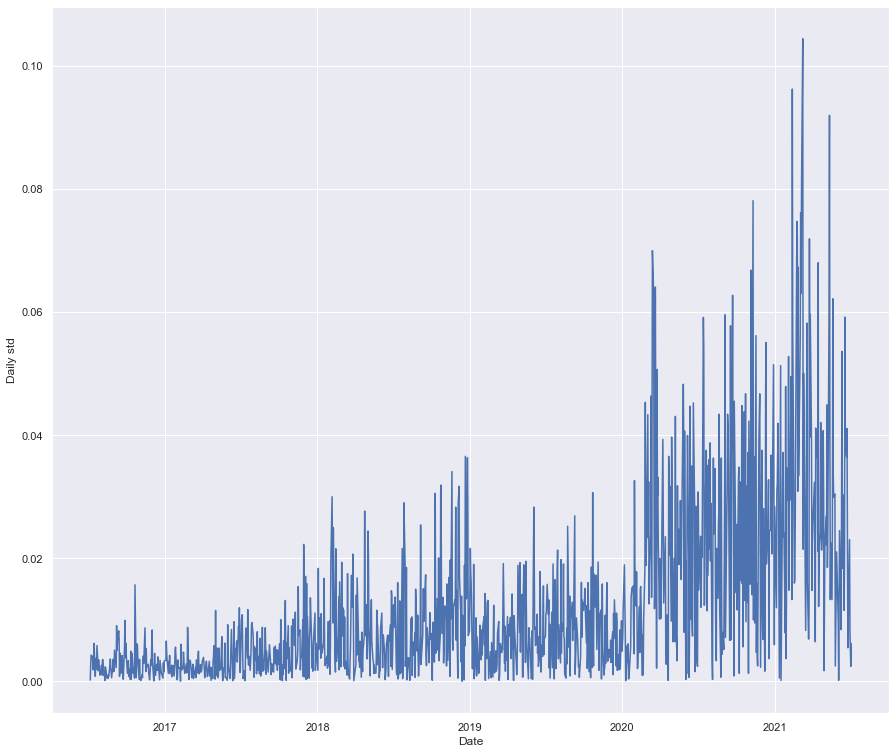

In [16]:
sns.lineplot(data=paypal, x = 'Date', y = 'Daily std')
plt.show()